<div >
<img src = "../banner.jpg" />
</div>

In [1]:
require("pacman")

p_load("imager")

Loading required package: pacman



In [2]:
# Max pooling function for a single position
max_pooling <- function(img, k, x, y) {
  # Determine the starting point for the kernel
  k_start <- -floor(k / 2)
  
  # Get an image slice of size k x k centered at (x, y)
  img_slice <- img[(y + k_start):(y + k_start + k - 1), (x + k_start):(x + k_start + k - 1)]
  
  # Return the maximum value of this image slice
  return(max(img_slice))
}

# Max pooling function for the entire image
max_pooling_image <- function(img, k, stride = 1) {
  # Get the dimensions of the input image
  height <- nrow(img)
  width <- ncol(img)
  
  # Define start and end points for rows and columns
  row_start <- floor(k / 2) + 1
  row_end <- height - k + 2

  col_start <- floor(k / 2) + 1
  col_end <- width - k + 2

  # Initialize the pooled image with calculated dimensions
  pooled_height <- floor((height - k) / stride) + 1
  pooled_width <- floor((width - k) / stride) + 1
  pooled_image <- matrix(0, nrow = pooled_height, ncol = pooled_width)
  
  # Iterate through each window in the image
  for (i in seq_len(pooled_height)) {
    for (j in seq_len(pooled_width)) {
      # Calculate the corresponding y and x positions in the original image
      y <- row_start + (i - 1) * stride
      x <- col_start + (j - 1) * stride
      
      # Perform max-pooling for the current window
      pooled_image[i, j] <- max_pooling(img, k, x, y)
    }
  }
  
  # Return the pooled image
  return(pooled_image)
}

# Input image
img <- matrix(c(0, 3, 6, 9,
                1, 4, 7, 10,
                2, 5, 8, 11), nrow = 3, byrow = TRUE)

# Kernel size
k <- 2

# Performing maximum image pooling
pooled_image <- max_pooling_image(img, k)
pooled_image # Display the image after pooling


4,7,10
5,8,11


In [3]:
# Install required packages if not already installed
if (!require("imager")) install.packages("imager")
library(imager)

# Convolution function for a single point
convolve <- function(img, filter_, k, x, y) {
    sum <- 0
    # Determine the starting point of the kernel
    k_start <- as.integer(-floor(k/2))
    # Convolution: multiply the image and filter elements and sum them
    for (i in 0:(k-1)) {
        for (j in 0:(k-1)) {
            img_y <- y + i + k_start
            img_x <- x + j + k_start
            sum <- sum + img[img_y, img_x] * filter_[i + 1, j + 1]
        }
    }
    return(sum)
}

# Convolution function for the entire image

convolve_image <- function(img, filter_) {
    k <- nrow(filter_)
    height <- nrow(img)
    width <- ncol(img)
    
    # Define full output image with zero padding
    new_image <- matrix(0, nrow=height, ncol=width)
    
    # Calculate bounds for the convolution within the image
    row_start <- as.integer(floor(k / 2)) + 1
    row_end <- height - as.integer(floor(k / 2))
    col_start <- as.integer(floor(k / 2)) + 1
    col_end <- width - as.integer(floor(k / 2))
    
    # Apply convolution only to the valid part of the image
    for (y in row_start:row_end) {
        for (x in col_start:col_end) {
            new_image[y, x] <- convolve(img, filter_, k, x, y)
        }
    }
    
    return(as.cimg(new_image))  # Convert matrix back to cimg format
}



# Main processing
img <- load.image("figs/Lenna_(test_image).png")
img <- grayscale(img)

# Create the filter
k <- 15
filter_ <- matrix(0, nrow=k, ncol=k)
filter_[, ceiling(k/2)] <- 1

# Perform convolution
new_image <- convolve_image(as.matrix(img), filter_)
class(new_image)



[1] "cimg"         "imager_array" "numeric"

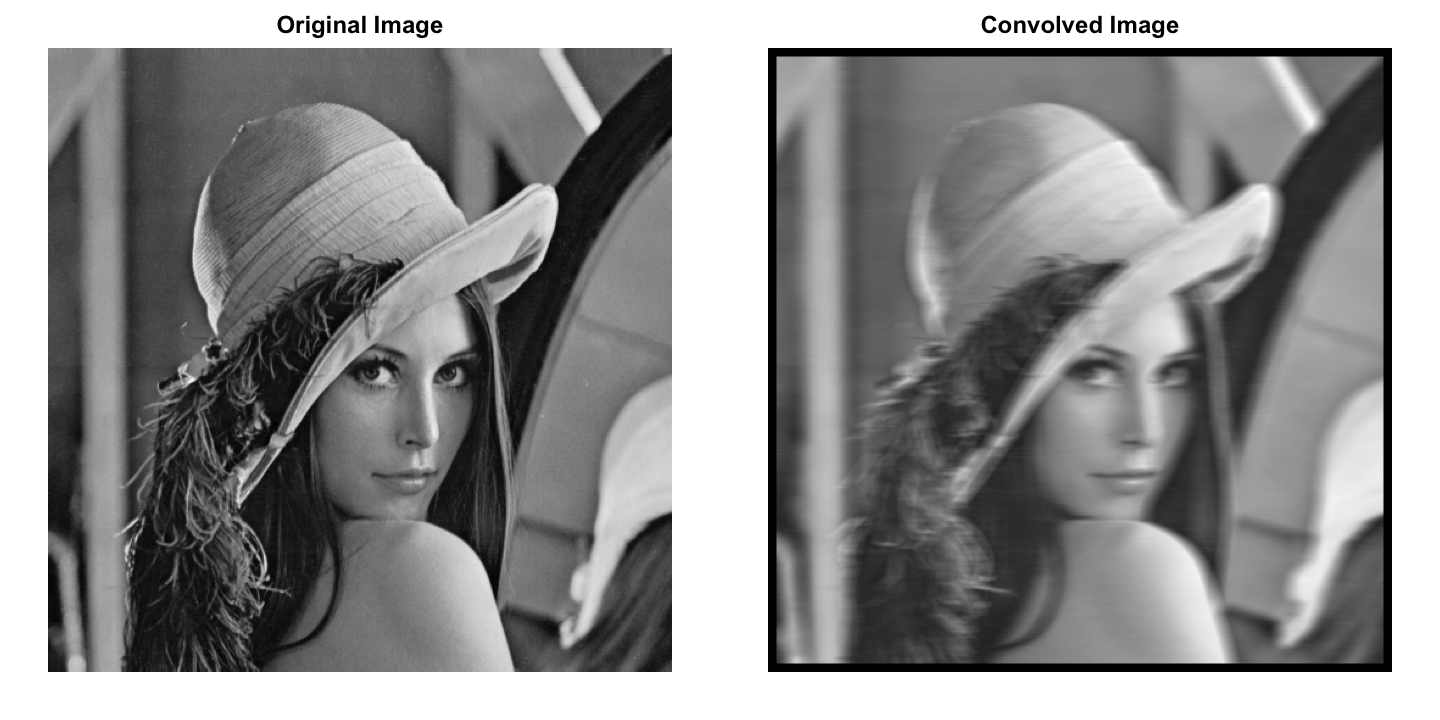

In [4]:

# Increase image size in Jupyter Notebook
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2), mar=c(2,2,2,2))  # Adjust margins for larger images

# Display original image with correct orientation
plot(img, main="Original Image", axes=FALSE)

# Display convolved image with correct orientation
plot(new_image, main="Convolved Image", axes=FALSE)

# Reset plotting parameters
par(mfrow=c(1,1))

In [5]:
# Max pooling function for a single position
max_pooling <- function(img, k, x, y) {
  # Determine the starting point for the kernel
  k_start <- -floor(k / 2)
  
  # Get an image slice of size k x k centered at (x, y)
  img_slice <- img[(y + k_start):(y + k_start + k - 1), (x + k_start):(x + k_start + k - 1)]
  
  # Return the maximum value of this image slice
  return(max(img_slice))
}

# Max pooling function for the entire image
max_pooling_image <- function(img, k, stride = 1) {
  # Convert 'cimg' object to matrix if necessary
  if (inherits(img, "cimg")) {
    img <- as.matrix(img)
  }
  
  # Get the dimensions of the input image
  height <- nrow(img)
  width <- ncol(img)
  
  # Define start and end points for rows and columns
  row_start <- floor(k / 2) + 1
  row_end <- height - k + 2
  col_start <- floor(k / 2) + 1
  col_end <- width - k + 2

  # Initialize the pooled image with calculated dimensions
  pooled_height <- floor((height - k) / stride) + 1
  pooled_width <- floor((width - k) / stride) + 1
  pooled_image <- matrix(0, nrow = pooled_height, ncol = pooled_width)
  
  # Iterate through each window in the image
  for (i in seq_len(pooled_height)) {
    for (j in seq_len(pooled_width)) {
      # Calculate the corresponding y and x positions in the original image
      y <- row_start + (i - 1) * stride
      x <- col_start + (j - 1) * stride
      
      # Perform max-pooling for the current window
      pooled_image[i, j] <- max_pooling(img, k, x, y)
    }
  }
  
 # Convert the pooled matrix back to 'cimg' class to return as an image
  pooled_image_cimg <- as.cimg(pooled_image)
  
  # Return the pooled image in 'cimg' format
  return(pooled_image_cimg)
}


In [6]:
# Set the kernel size for pooling
k_pooling <- 10
# Perform a pooling operation on the image after convolution
pooled_image <- max_pooling_image(new_image, k_pooling, k_pooling)
class(pooled_image)

[1] "cimg"         "imager_array" "numeric"

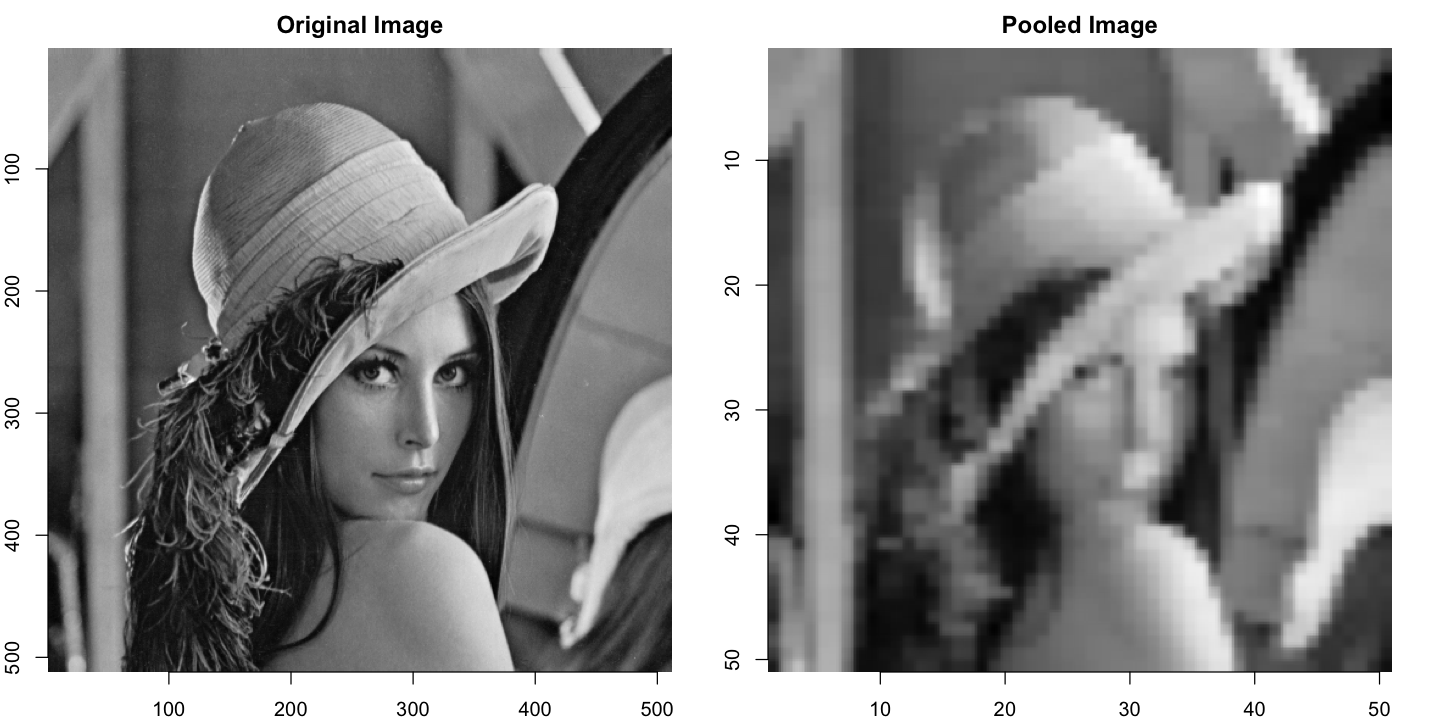

In [7]:

# Increase image size in Jupyter Notebook
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2), mar=c(2,2,2,2))  # Adjust margins for larger images

# Display original image with correct orientation
plot(img, main="Original Image", axes=TRUE)

# Display convolved image with correct orientation
plot(pooled_image, main="Pooled Image", axes=TRUE)

# Reset plotting parameters
par(mfrow=c(1,1))